# Team Mobile Madness

---

You are on the data science department of a mobile device company. In an effort to extend account lifetime of existing customers, we need to develop targeted A/B experiments. In order to do that efficiently, we need to have a better degree of certainty about which customers are likely to to "churn" and why.

**Goals:**
- Research the concept of "churn" and A/B testing
- Identify behaviors strongly correlated with churn in this dataset
- Suggest what we should develop A/B tests for

**Presentation requirements:**
- Concisely explain churn and A/B testing to the audience
- At least 50% of presentation must address a non-technical audience
- Someone who hasn't presented in class yet must take lead on presentation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline



In [2]:
df = pd.read_csv("/Users/Mahendra/desktop/GA/hw/3.5.2_eda-group_projects_2-lab/datasets/churn-bigml-20.csv")

In [3]:
df.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True


In [28]:
df1=df[['International plan','Churn']]
df1


,International plan,Churn
0,No,False
1,No,True
2,No,True
3,No,False
4,No,False
5,No,False
6,No,False
7,No,True
8,No,False
9,No,False


In [11]:
df.shape

(667, 20)

In [31]:
(df1[(df1['International plan']== 'Yes')&(df1['Churn']== True)])

,International plan,Churn
47,Yes,True
65,Yes,True
96,Yes,True
98,Yes,True
109,Yes,True
110,Yes,True
123,Yes,True
154,Yes,True
163,Yes,True
170,Yes,True


In [32]:
len(df1[(df1['International plan']== 'Yes')&(df1['Churn']== True)])
# 19 with international plan are levaing

19

In [34]:
len(df[(df['Voice mail plan']== 'Yes')&(df['Churn']== True)])
#15 are enrolled with voice plan are leaving

15

In [35]:
len(df[(df['International plan']== 'Yes')&(df['Voice mail plan']== 'Yes')&(df['Churn']== True)])
#7 are leaving who has both international and voice mail plas

7

In [36]:
len(df[(df['International plan']== 'Yes')&(df['Voice mail plan']== 'Yes')])
# 10 are staying back who are having internation and voice mail plan

17

In [37]:
max(df['Account length'])

232

In [38]:
min(df['Account length'])

1

In [43]:
len(df['Account length']<=30)

667

In [40]:
len((df['Account length']<=30)&(df['Churn']== True))

667

In [41]:
len((df['Account length']<=45)&(df['Churn']== True))

667

In [46]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [57]:
df2=df[['Total night charge','Churn']]
df2

,Total night charge,Churn
0,9.71,False
1,9.40,True
2,7.23,True
3,8.53,False
4,8.04,False
5,5.82,False
6,6.06,False
7,6.44,True
8,12.73,False
9,5.84,False


In [63]:
df_night=df2[df2['Churn']== True]
df_night

,Total night charge,Churn
1,9.40,True
2,7.23,True
7,6.44,True
14,8.82,True
16,12.38,True
35,8.18,True
41,8.71,True
47,9.98,True
52,9.64,True
56,14.04,True


In [68]:
df_night.sort(['Total night charge'], ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Total night charge,Churn
56,14.04,True
552,13.78,True
61,13.37,True
573,13.14,True
100,12.96,True
615,12.80,True
114,12.59,True
16,12.38,True
409,12.22,True
201,11.84,True


In [69]:
df3=df[['Total intl charge','Churn']]
df3

,Total intl charge,Churn
0,2.35,False
1,3.43,True
2,1.46,True
3,2.08,False
4,3.00,False
5,3.92,False
6,3.56,False
7,2.38,True
8,3.08,False
9,3.27,False


In [74]:
df_int=df3[df3['Churn']== True]
df_int

,Total intl charge,Churn
1,3.43,True
2,1.46,True
7,2.38,True
14,2.40,True
16,2.65,True
35,2.89,True
41,2.75,True
47,2.81,True
52,1.76,True
56,1.43,True


In [72]:
df_int.sort(['Total intl charge'], ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Total intl charge,Churn
546,4.94,True
437,4.67,True
201,4.24,True
225,4.16,True
154,4.13,True
170,3.92,True
96,3.86,True
552,3.83,True
279,3.78,True
590,3.73,True


In [76]:

subset= df[['Total day charge','Total eve charge','Total night charge','Total intl charge','Churn']]

In [107]:
#calculating total charges
df_total=pd.Series(df['Total day charge']+df['Total eve charge']+df['Total night charge']+df['Total intl charge'],name='full')

In [108]:
import pandas as pd

In [109]:
# concatenating that column with our main table
my_df=pd.concat([df,df_total],axis=1)

In [110]:
my_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,full
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,73.32
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,True,54.20
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,True,92.29
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,False,41.05
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,False,49.60
5,AK,36,408,No,Yes,30,146.3,128,24.87,162.5,...,13.81,129.3,109,5.82,14.5,6,3.92,0,False,48.42
6,MI,65,415,No,No,0,211.3,120,35.92,162.6,...,13.82,134.7,118,6.06,13.2,5,3.56,3,False,59.36
7,ID,119,415,No,No,0,159.1,114,27.05,231.3,...,19.66,143.2,91,6.44,8.8,3,2.38,5,True,55.53
8,VA,10,408,No,No,0,186.1,112,31.64,190.2,...,16.17,282.8,57,12.73,11.4,6,3.08,2,False,63.62
9,WI,68,415,No,No,0,148.8,70,25.30,246.5,...,20.95,129.8,103,5.84,12.1,3,3.27,3,False,55.36


In [139]:

my_df1=my_df[['full','Churn']]
my_df1

,full,Churn
0,73.32,False
1,54.20,True
2,92.29,True
3,41.05,False
4,49.60,False
5,48.42,False
6,59.36,False
7,55.53,True
8,63.62,False
9,55.36,False


In [120]:
people_left=my_df1[my_df1['Churn']== True]
people_left



,full,Churn
1,54.20,True
2,92.29,True
7,55.53,True
14,62.03,True
16,75.32,True
35,81.57,True
41,52.27,True
47,38.78,True
52,54.16,True
56,89.31,True


In [133]:
people_stayed=my_df1[my_df1['Churn']== False]
people_stayed

,full,Churn
0,73.32,False
3,41.05,False
4,49.60,False
5,48.42,False
6,59.36,False
8,63.62,False
9,55.36,False
10,64.00,False
11,65.16,False
12,60.57,False


In [140]:
people_left.sort(['full'], ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,full,Churn
2,92.29,True
56,89.31,True
549,87.27,True
401,84.93,True
442,84.92,True
327,84.67,True
203,84.56,True
351,84.08,True
561,83.99,True
573,83.35,True


In [142]:
np.mean(people_left)

full     67.464
Churn     1.000
dtype: float64

In [141]:
people_stayed.sort(['full'], ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,full,Churn
340,87.29,False
146,86.38,False
425,83.33,False
213,82.31,False
636,82.14,False
509,81.19,False
137,79.07,False
444,77.82,False
468,76.81,False
161,76.39,False


In [143]:
np.mean(people_stayed)

full     58.524668
Churn     0.000000
dtype: float64

In [144]:
people_left.describe()

,full
count,95.00000
mean,67.46400
std,14.06669
min,38.78000
25%,54.36000
50%,74.57000
75%,77.96500
max,92.29000


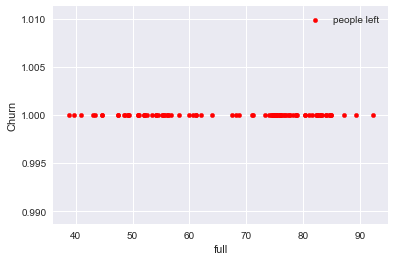

In [126]:
people_left.plot.scatter(x='full',y='Churn',color='r',label='people left')

In [127]:
import seaborn as sns

//anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


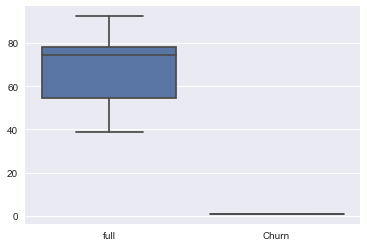

In [128]:
sns.boxplot(people_left)

In [131]:
import matplotlib.pyplot as plt

In [132]:
fig=plt.figure(figsize(6,4))
ax=fig.gca()
ax=sns.boxplot(people_left.full,orient='v',fliersize=8,linewidth=1.5,notch=True,saturation=0.5,ax=ax)
ax.set_ylabel('full',fontsize=16)
ax.set_title('people left',fontsize=16)
plt.show()

NameError: name 'figsize' is not defined

In [145]:
my_df.columns

Index([u'State', u'Account length', u'Area code', u'International plan',
       u'Voice mail plan', u'Number vmail messages', u'Total day minutes',
       u'Total day calls', u'Total day charge', u'Total eve minutes',
       u'Total eve calls', u'Total eve charge', u'Total night minutes',
       u'Total night calls', u'Total night charge', u'Total intl minutes',
       u'Total intl calls', u'Total intl charge', u'Customer service calls',
       u'Churn', u'full'],
      dtype='object')

In [ ]:
my_df[(my_df['International plan']== 'No') & 